**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Renzo Antonio Zagni Vestrini
*   MATRÍCULA: A01795457

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
os.chdir(DIR)

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [182]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [183]:
import warnings
warnings.filterwarnings('ignore')
insurance_df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [184]:
insurance_df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [185]:
insurance_df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [186]:
insurance_df.isna().sum()
# Ninguna columna tienes valores faltantes

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

In [187]:
def histbox(df_name, col_name):
  fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={"height_ratios": (.3, .7)})
  ax[0].set_title(col_name.capitalize())
  df_name.boxplot(column=col_name, vert=False, ax=ax[0])
  df_name.hist(column=col_name, bins=20, ax=ax[1])
  ax[1].title.set_size(0)
  plt.subplots_adjust(hspace=0.2)
  print('')
  plt.show()

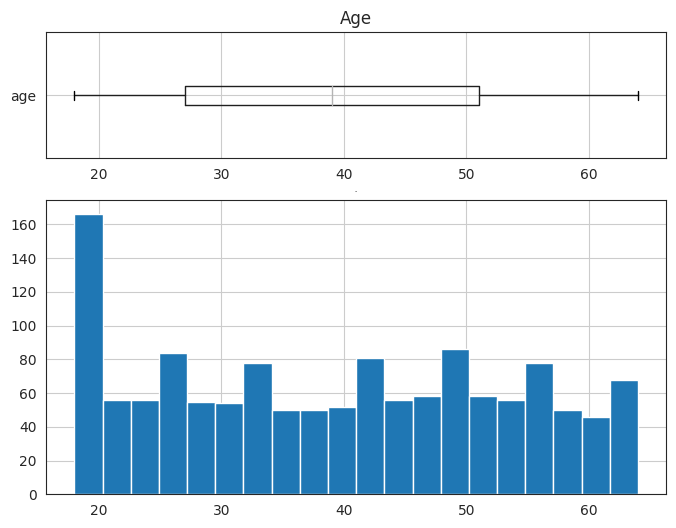

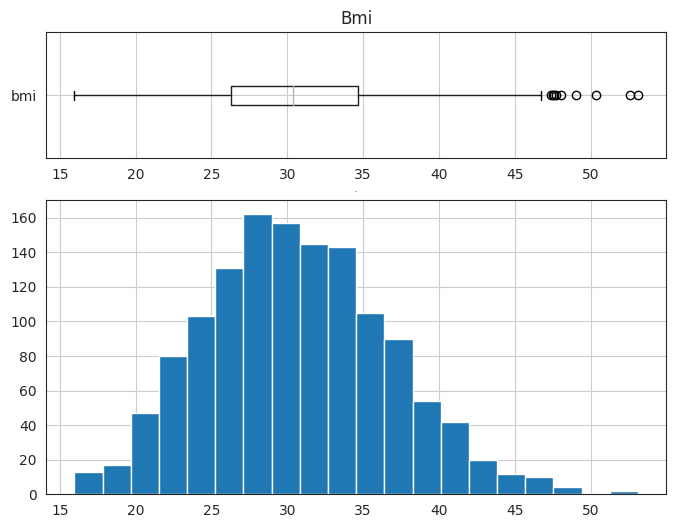

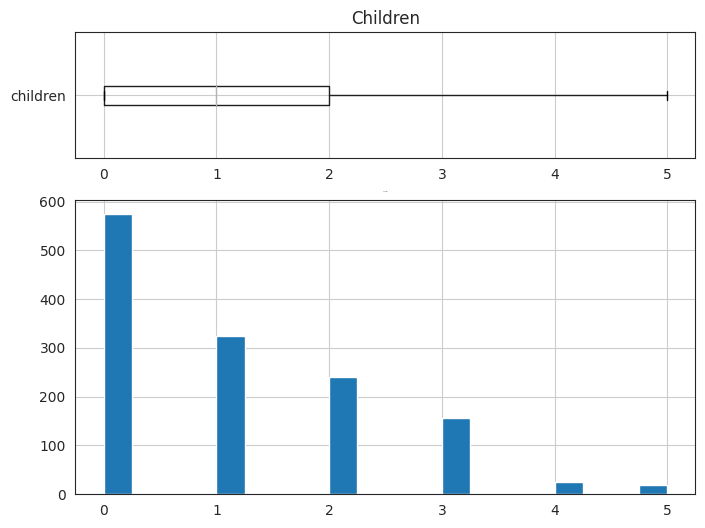

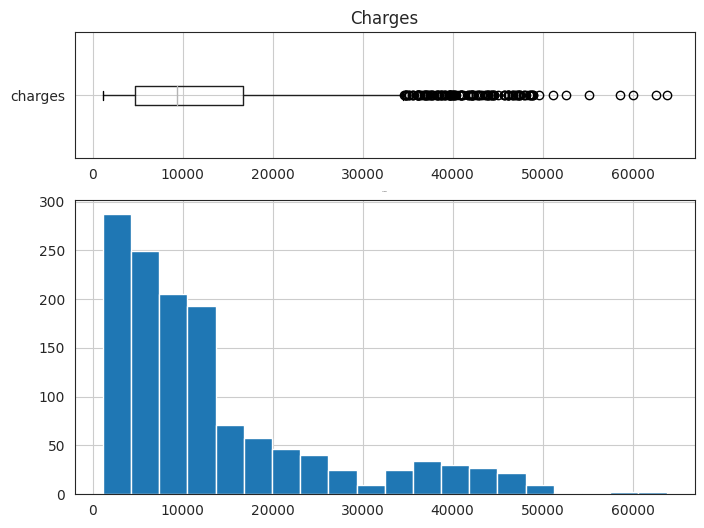

In [188]:
# Boxplot e histogramas para variables cuantitativas
for colname in insurance_df.select_dtypes(include=np.number).columns.tolist():
  histbox(insurance_df, colname)

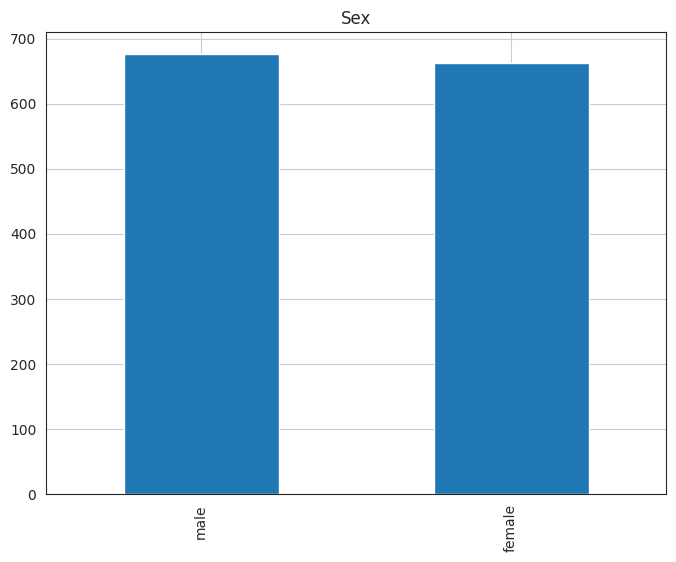

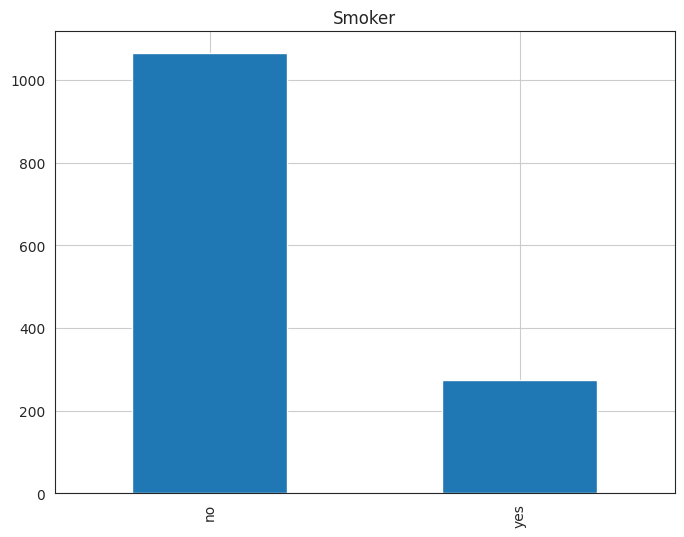

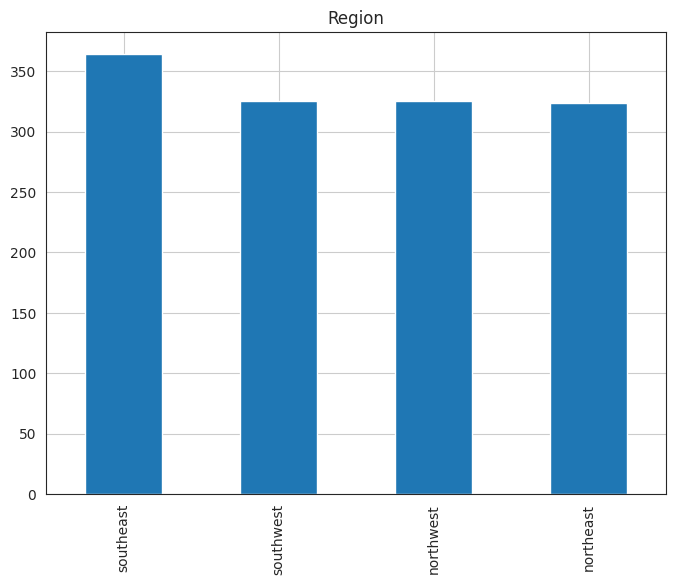

In [189]:
for colname in insurance_df.select_dtypes(include='object').columns.tolist():
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.set_title(colname.capitalize())
  insurance_df[colname].value_counts().plot(ax=ax, kind='bar')
  plt.grid()
  print('')
  plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

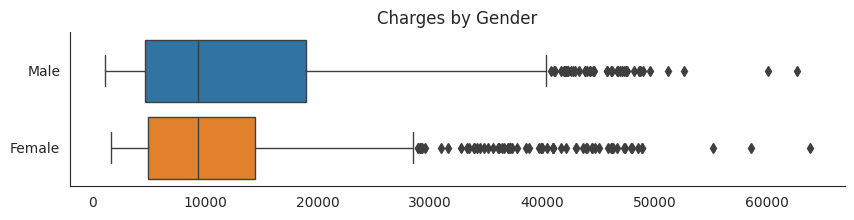

In [190]:
combined_df = pd.DataFrame({'Male': insurance_df['charges'].loc[insurance_df['sex'] == 'male'],
                            'Female': insurance_df['charges'].loc[insurance_df['sex'] == 'female']})
plt.figure(figsize=(10,2))
plt.title('Charges by Gender')
sns.set_style('white')
sns.boxplot(data=combined_df, orient='h', linewidth= 1.0)
sns.despine()
plt.show()
# Segun el diagrama boxplot las mujeres disfrutan de primas mas bajas que los
# hombres

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

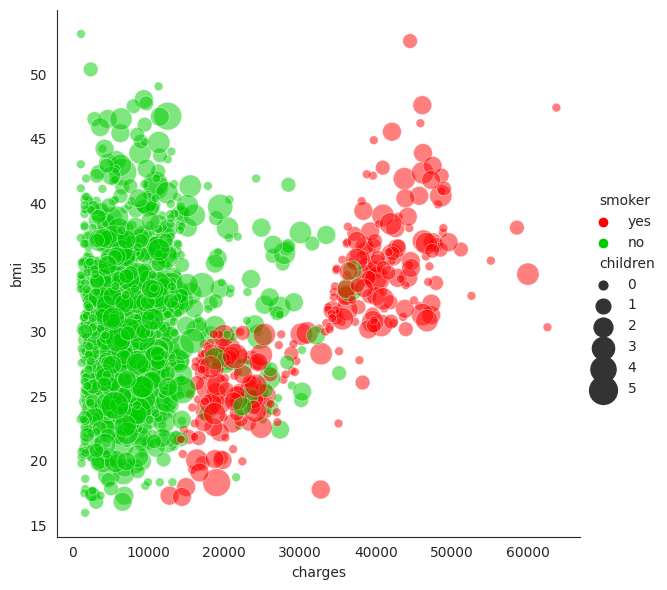

In [191]:
colors = ["#FF0000", "#00CC00"] # Colores Rojo y Verde
sns.set_palette(sns.color_palette(colors))
sns.relplot(x="charges", y="bmi", hue="smoker", size="children",
            sizes=(40, 400), alpha=.5,
            height=6, data=insurance_df)
plt.show()
# Del grafico podemos concluir que la categoria fumador es la que tiene mas
# influencia sobre el incremento de la prima. En otras palabras, una persona
# fumadora debera pagar primas mucho mas altas que una persona no fumadora.
# Entre los fumadores, aquellos con altos BMI deberan pagar primas mas altas
# que los fumadores con BMI mas bajos.
# Entre los no fumadores, el BMI no parece tener influencia sobre las primas
# El numero de hijos tampoco parece tener relevancia en el costo de las primas
# independientemente que que la persona sea fumadora o no o que del valor de
# su BMI

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

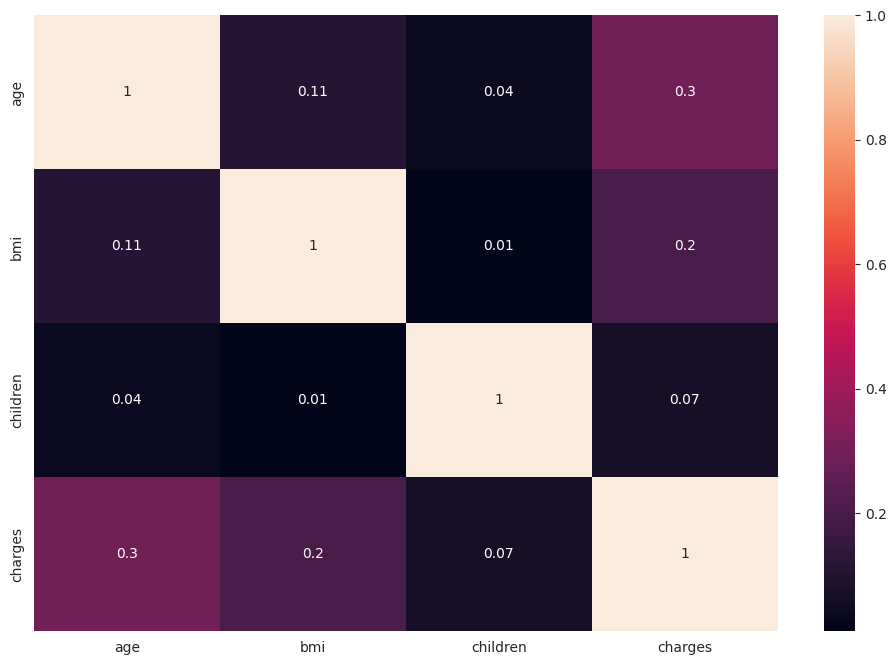

In [192]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (12, 8))
sns.heatmap(round(insurance_df.corr(),2), annot = True)
plt.show()
# Las variables numericas tienen baja correlacion entra ellas. Podemos destacar
# que aunque las correlaciones sean bajas ,las correlaciones entre 'charges' y
# 'age' es  la mas alta con respecto a las otras variables lo que puede indicar
# que el monto de la prima puede esta siendo influenciada por personas de alta
# edad

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [193]:
# Tenemos valores atipicos sobre y bajo los quartiles Q4 y Q1 respectivamente
# Calculamos Q1, Q3 y IQR
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
LimitMax = Q3 + 1.5 * IQR
LimitMin = Q1 - 1.5 * IQR
# Identificamos outliers en charges > Q3 + 1.5 * IQR y < Q1 - 1.5 IQR
# y alamacenamos registros en dataframe independient
atipicos_charges_df  = insurance_df[(insurance_df['charges'] < LimitMin) | (insurance_df['charges'] > LimitMax)]

In [194]:
print("Promedio de \'age\' en los registros con valores atipicos de \'charges\': " + str(round(atipicos_charges_df['age'].mean(), 2)))
print("Promedio de \'bmi\' en los registros con valores atipicos de \'charges\': " + str(round(atipicos_charges_df['bmi'].mean(), 2)))

Promedio de 'age' en los registros con valores atipicos de 'charges': 41.08
Promedio de 'bmi' en los registros con valores atipicos de 'charges': 35.56


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [195]:
cnt_total = len(atipicos_charges_df)
cnt_women = len(atipicos_charges_df[atipicos_charges_df['sex'] =='female'])
cnt_smokers = len(atipicos_charges_df[atipicos_charges_df['smoker'] == 'yes'])
print("Porcentaje de observaciones que corresponden a mujeres: " + str(round(((cnt_women/cnt_total) * 100), 2)) + "%")
print("Porcentaje de observaciones que corresponden a hombres: " + str(round((((cnt_total - cnt_women)/cnt_total) * 100), 2)) + "%")
print("Porcentaje de observaciones que corresponden a fumadores: " + str(round(((cnt_smokers/cnt_total) * 100), 2)) + "%")
print("Porcentaje de observaciones que corresponden a fumadores: " + str(round((((cnt_total - cnt_smokers)/cnt_total) * 100), 2)) + "%")

Porcentaje de observaciones que corresponden a mujeres: 35.97%
Porcentaje de observaciones que corresponden a hombres: 64.03%
Porcentaje de observaciones que corresponden a fumadores: 97.84%
Porcentaje de observaciones que corresponden a fumadores: 2.16%


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [196]:
X = insurance_df.iloc[:,0:-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [197]:
y = insurance_df.loc[:,'charges']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=insurance_df['smoker'], random_state=1)

XTrain Numeric



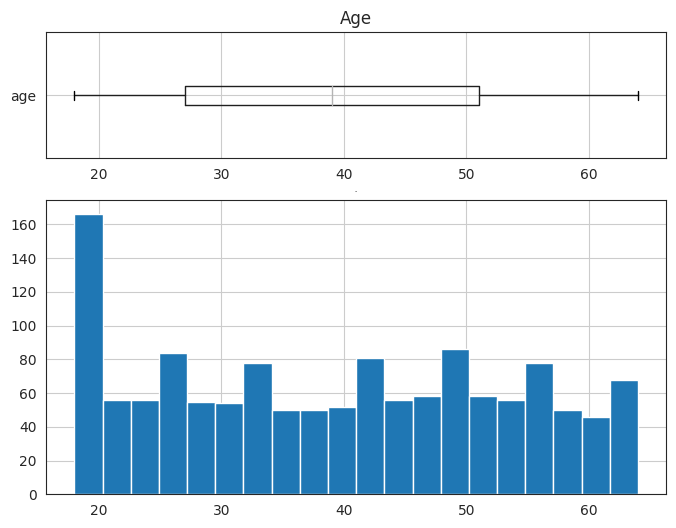

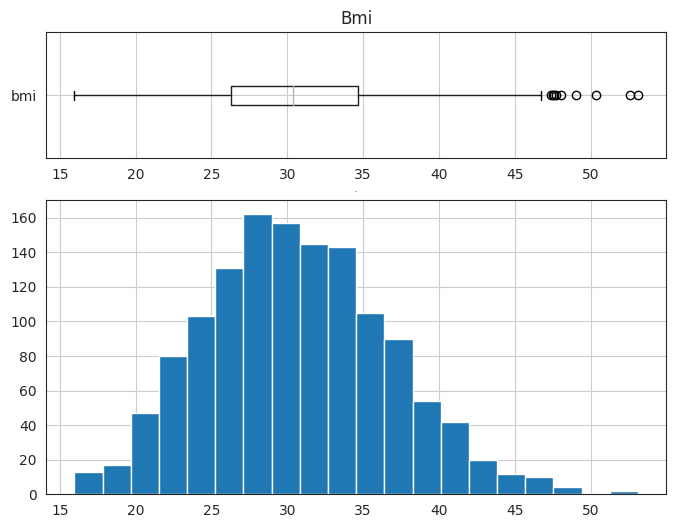

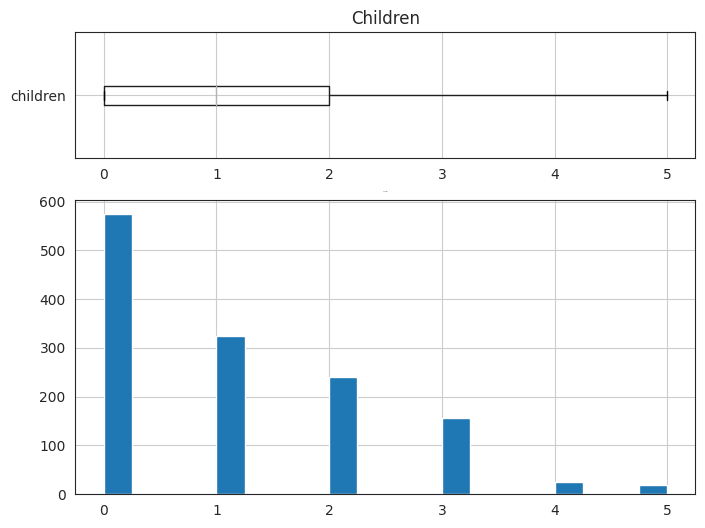

In [199]:
# Como se puede observar en los histogramas, box plot y diagrama de frecuencia
# la distrubucion de los datos se mantiene de forma consistente en los conjuntos
# de datos de entrenamiento y de prueba
sns.set_palette('tab10')
print("XTrain Numeric")
for colname in X_train.select_dtypes(include=np.number).columns.tolist():
  histbox(insurance_df, colname)

XTest Numeric



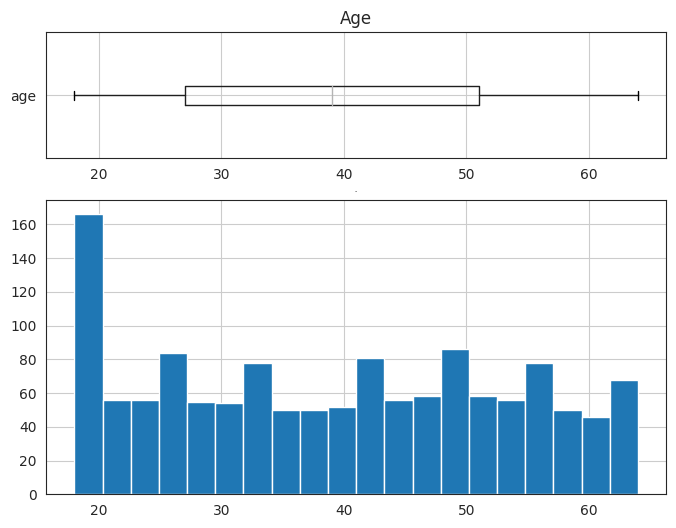

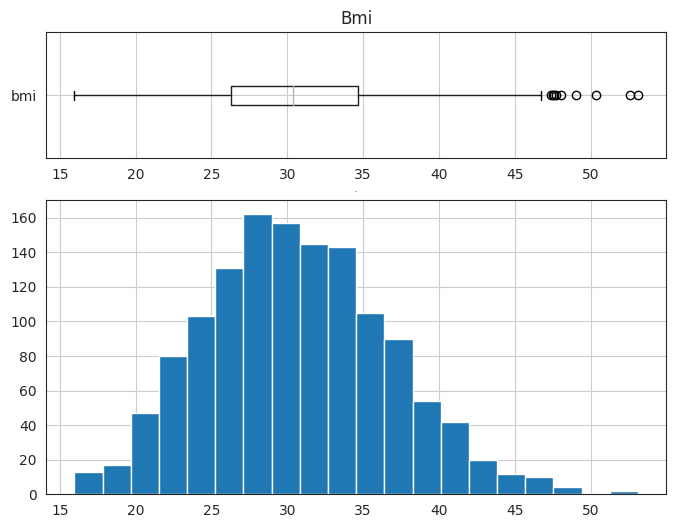

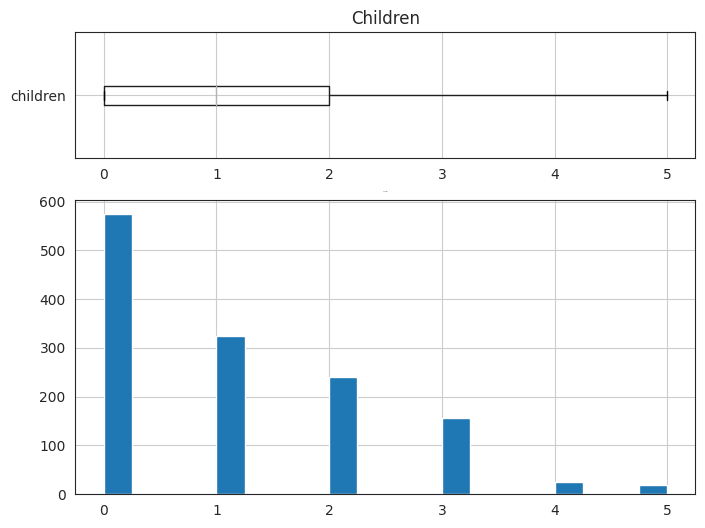

In [200]:
# Boxplot e histogramas para variables cuantitativas de Xtrain
print("XTest Numeric")
for colname in X_test.select_dtypes(include=np.number).columns.tolist():
  histbox(insurance_df, colname)

XTrain Catericos



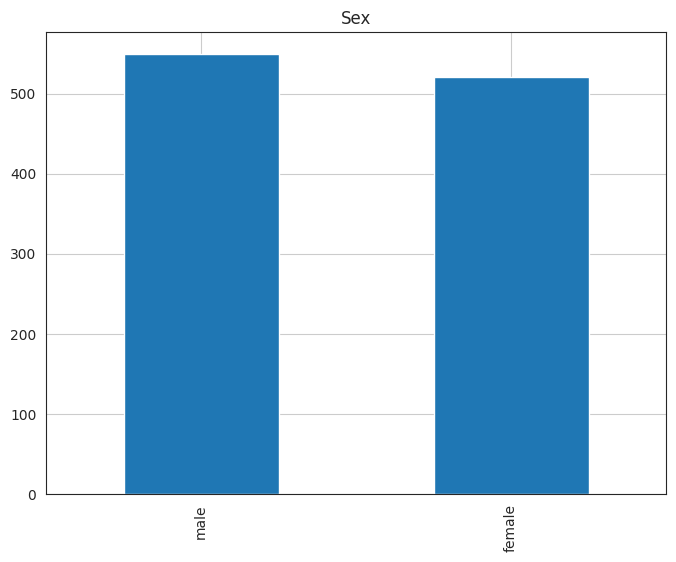

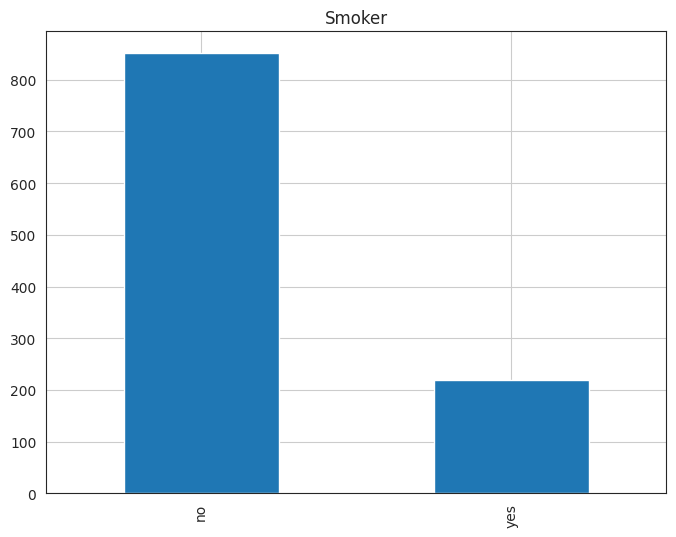

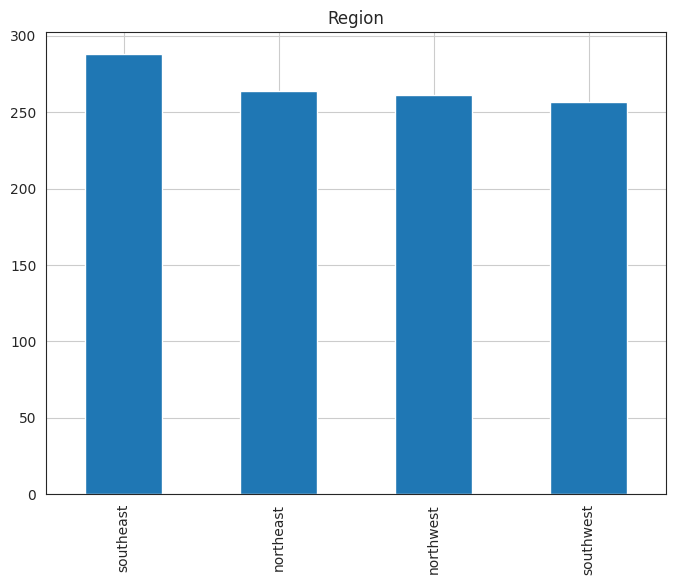

In [201]:
print("XTrain Catericos")
for colname in X_train.select_dtypes(include='object').columns.tolist():
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.set_title(colname.capitalize())
  X_train[colname].value_counts().plot(ax=ax, kind='bar')
  plt.grid()
  print('')
  plt.show()

XText Categoricos



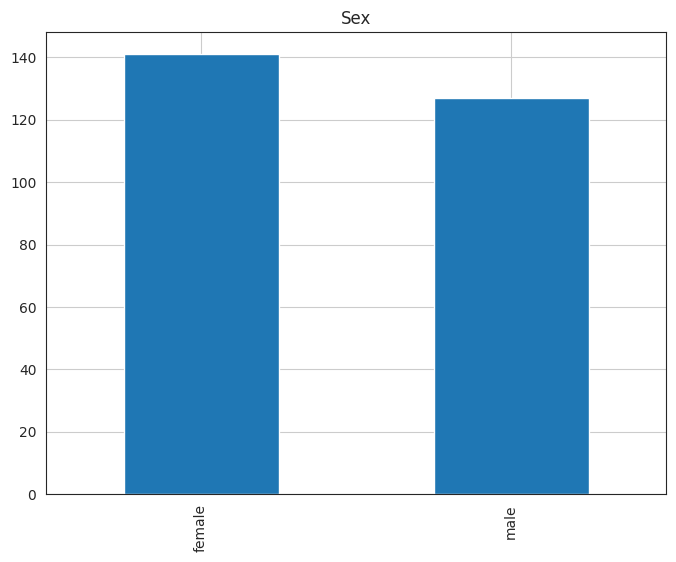

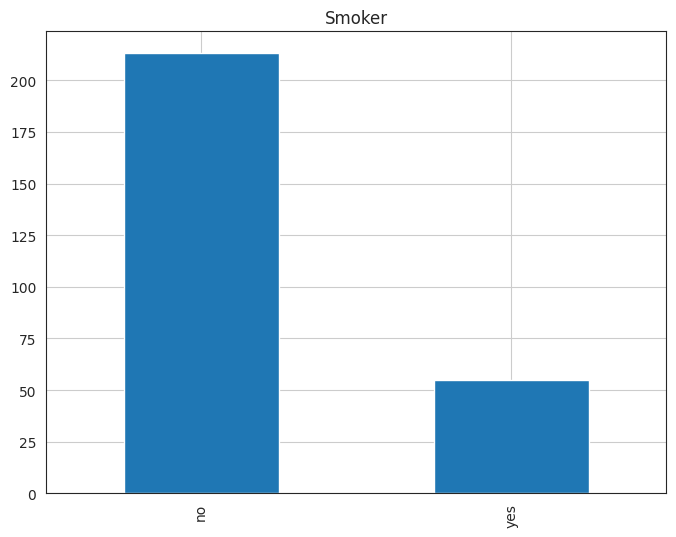

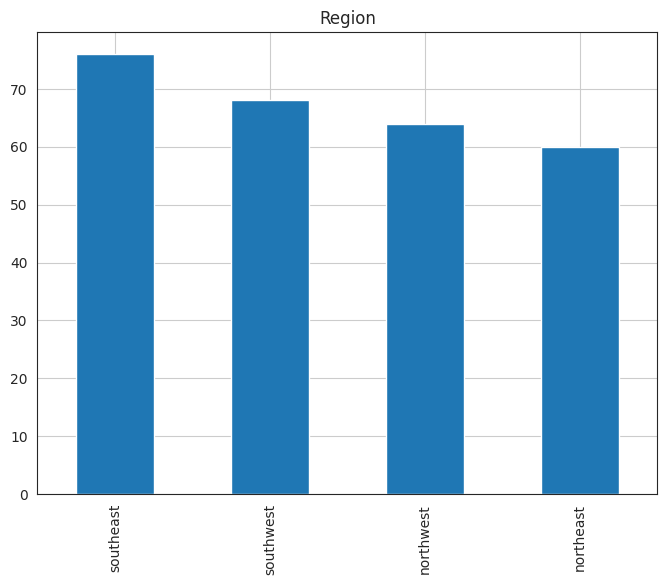

In [202]:
print("XText Categoricos")
for colname in X_train.select_dtypes(include='object').columns.tolist():
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.set_title(colname.capitalize())
  X_test[colname].value_counts().plot(ax=ax, kind='bar')
  plt.grid()
  print('')
  plt.show()

In [203]:
X_train.select_dtypes(include='object')

,sex,smoker,region
42,male,no,southeast
847,male,no,southeast
625,female,no,northwest
394,female,no,northeast
621,male,yes,southwest
...,...,...,...
56,female,no,northeast
599,female,no,northwest
36,female,no,northwest
1179,male,yes,southeast


yTrain



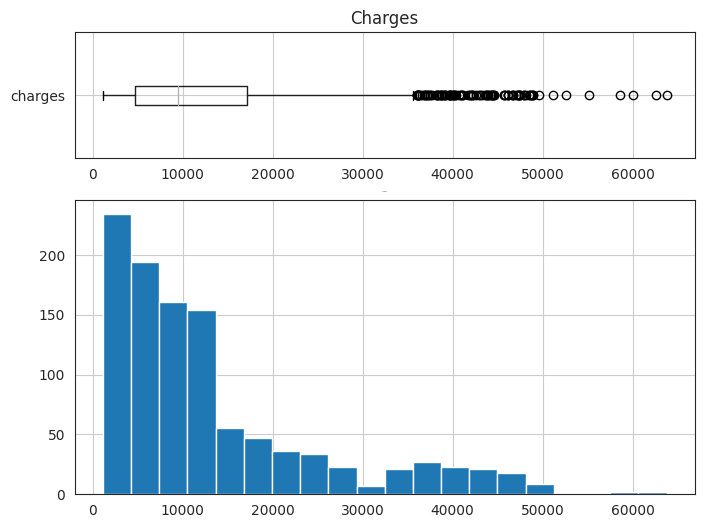

In [204]:
print("yTrain")
y_train_df = pd.DataFrame(y_train)
histbox(y_train_df, 'charges')

yTest



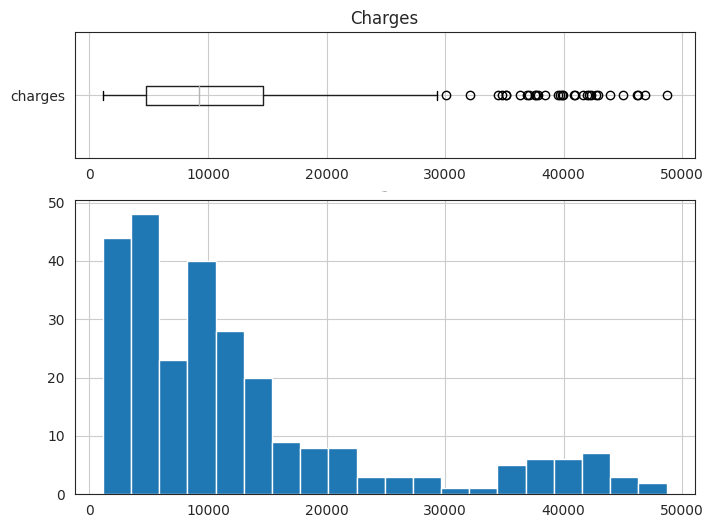

In [205]:
print("yTest")
y_test_df = pd.DataFrame(y_test)
histbox(y_test_df, 'charges')

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [206]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [207]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', round(mean_squared_error(y_test, predictions, squared=False), 4))
print('The R square (R2) is:', round(r2_score(y_test, predictions), 4))

The Root Mean Square Error (RMSE) is: 5698.7598
The R square (R2) is: 0.7539


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [215]:
y_train_sans_out = y_train.where(y_train < LimitMax, LimitMax)
y_test_sans_out = y_test.where(y_test < LimitMax, LimitMax)

In [217]:
lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(X_train, y_train_sans_out)
predictions = lr_model2.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', round(mean_squared_error(y_test, predictions, squared=False), 4))
print('The R square (R2) is:', round(r2_score(y_test, predictions), 4))

The Root Mean Square Error (RMSE) is: 5741.0138
The R square (R2) is: 0.7502


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [221]:
preprocessing2 = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))])

lr_model3 = make_pipeline(preprocessing, LinearRegression())
lr_model3.fit(X_train, y_train)
predictions = lr_model3.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', round(mean_squared_error(y_test, predictions, squared=False), 4))
print('The R square (R2) is:', round(r2_score(y_test, predictions), 4))

The Root Mean Square Error (RMSE) is: 5698.7598
The R square (R2) is: 0.7539


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [224]:
from sklearn.preprocessing import PolynomialFeatures

lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
lr_model4.fit(X_train, y_train)
predictions = lr_model4.predict(X_test)

print('The Root Mean Square Error (RMSE) is:', round(mean_squared_error(y_test, predictions, squared=False), 4))
print('The R square (R2) is:', round(r2_score(y_test, predictions), 4))

The Root Mean Square Error (RMSE) is: 4492.6449
The R square (R2) is: 0.847
